In [1]:
import pandas as pd

Read in the data acquired. 

In [2]:
wreport = pd.read_csv('World Health Report 2003.csv')

sars = pd.read_csv("sars_2003_complete_dataset_clean.csv")

tsCon = pd.read_csv("time_series_covid_19_confirmed.csv")
tsRec = pd.read_csv("time_series_covid_19_recovered.csv")
tsD = pd.read_csv("time_series_covid_19_deaths.csv")

In [3]:
tsCon = tsCon.drop(['Province/State', 'Lat', 'Long'], axis = 1)
tsRec = tsRec.drop(['Province/State', 'Lat', 'Long'], axis = 1)
tsD = tsD.drop(['Province/State', 'Lat', 'Long'], axis = 1)

In [4]:
sars = sars.set_index('Date')
sars["Country"] = sars["Country"].replace("Hong Kong SAR, China", "China")
sars["Country"] = sars["Country"].replace("Macao SAR, China", "China")
sars["Country"] = sars["Country"].replace("Viet Nam", "Vietnam")

In [5]:
#Find the top five countries with most amount of cases
sar = sars.loc["2003-07-11"]
sar = sar.sort_values("Cumulative number of case(s)", ascending=False)
sar

,Country,Cumulative number of case(s),Number of deaths,Number recovered
Date,,,,
2003-07-11,China,5327,348,4941
2003-07-11,China,1755,298,1433
2003-07-11,"Taiwan, China",671,84,507
2003-07-11,Canada,250,38,194
2003-07-11,Singapore,206,32,172
2003-07-11,United States,75,0,67
2003-07-11,Vietnam,63,5,58
2003-07-11,Philippines,14,2,12
2003-07-11,Germany,10,0,9


Create a dataframe with all of the selected countries. 

In [6]:
countries = ["Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]
df = sars[sars["Country"].isin(countries)]

Create a dataframe with all 28 countries in the dataset. 

In [7]:
countries = ["Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "Spain", "Mongolia",
            "Thailand", "France", "India", "Romania", "South Africa", "Colombia", "Finland", "Brazil", "Malaysia",
            "Kuwait", "United Kingdom", "Philippines", "Sweden", "Republic of Korea", "Indonesia", 
             "Switzerland", "Russian Federation", "Republic of Ireland", "New Zealand"]
df1 = sars[sars["Country"].isin(countries)]

In [8]:
from datetime import datetime
dataC = sars[sars["Country"] == "China"].groupby("Date").count() 

dindex = pd.DataFrame(list(dataC.index.values))

d = sars[sars["Country"] == "China"].groupby("Date").sum()
dChina = list(d["Cumulative number of case(s)"].values)

dfChina = pd.DataFrame({"China": dChina})
dataChina = pd.concat([dindex,dfChina], axis=1, sort = False)
dataChina = dataChina.rename(columns={0: "Date"})
dataChina = dataChina.set_index('Date')

d = sars[sars["Country"] == "China"].groupby("Date").sum()
dChina = list(d["Number of deaths"].values)

dfChina = pd.DataFrame({"China": dChina})
dataChinaD = pd.concat([dindex,dfChina], axis=1, sort = False)
dataChinaD = dataChinaD.rename(columns={0: "Date"})
dataChinaD = dataChinaD.set_index('Date')

d = sars[sars["Country"] == "China"].groupby("Date").sum()
dChina = list(d["Number recovered"].values)

dfChina = pd.DataFrame({"China": dChina})
dataChinaR = pd.concat([dindex,dfChina], axis=1, sort = False)
dataChinaR = dataChinaR.rename(columns={0: "Date"})
dataChinaR = dataChinaR.set_index('Date')

DataFrame for the cumulative cases of each selected country. 

In [9]:
dfC = df.pivot_table(index='Date',
                     columns= 'Country',
                     values= 'Cumulative number of case(s)')
dfC = pd.concat([dfC,dataChina], axis=1, sort = False)
dfC

,Canada,Germany,Italy,Singapore,United States,Vietnam,China
Date,,,,,,,
2003-03-17,8.0,1.0,NaN,20.0,NaN,40.0,95
2003-03-18,8.0,2.0,NaN,23.0,NaN,57.0,123
2003-03-19,8.0,1.0,NaN,31.0,11.0,56.0,150
2003-03-20,9.0,1.0,NaN,34.0,11.0,62.0,173
2003-03-21,9.0,1.0,1.0,39.0,13.0,62.0,203
2003-03-22,9.0,2.0,2.0,44.0,22.0,63.0,222
2003-03-24,11.0,4.0,2.0,65.0,37.0,58.0,260
2003-03-25,11.0,4.0,2.0,69.0,39.0,58.0,286
2003-03-26,19.0,4.0,3.0,74.0,40.0,58.0,1108


DataFrame for the total deaths of each selected country.

In [10]:
dfD = df.pivot_table(index='Date',
                     columns= 'Country',
                     values= 'Number of deaths')
dfD = pd.concat([dfD,dataChinaD], axis=1, sort = False)
dfD

,Canada,Germany,Italy,Singapore,United States,Vietnam,China
Date,,,,,,,
2003-03-17,2.0,0.0,NaN,0.0,NaN,1.0,1
2003-03-18,2.0,0.0,NaN,0.0,NaN,1.0,1
2003-03-19,2.0,0.0,NaN,0.0,0.0,2.0,5
2003-03-20,2.0,0.0,NaN,0.0,0.0,2.0,6
2003-03-21,2.0,0.0,0.0,0.0,0.0,2.0,6
2003-03-22,2.0,0.0,0.0,0.0,0.0,2.0,7
2003-03-24,3.0,0.0,0.0,0.0,0.0,4.0,10
2003-03-25,3.0,0.0,0.0,0.0,0.0,4.0,10
2003-03-26,3.0,0.0,0.0,1.0,0.0,4.0,41


DataFrame for the recovered cases of each selected country.

In [11]:
dfR = df.pivot_table(index='Date',
                     columns= 'Country',
                     values= 'Number recovered')
dfR = pd.concat([dfR,dataChinaR], axis=1, sort = False)
dfR

,Canada,Germany,Italy,Singapore,United States,Vietnam,China
Date,,,,,,,
2003-03-17,0.0,0.0,NaN,0.0,NaN,0.0,0
2003-03-18,0.0,0.0,NaN,0.0,NaN,0.0,0
2003-03-19,0.0,0.0,NaN,0.0,0.0,0.0,0
2003-03-20,0.0,0.0,NaN,0.0,0.0,0.0,0
2003-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0
2003-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0
2003-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0
2003-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0
2003-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0


Interpolate the missing the data for the missing dates. Fill all the dates prior to the first case with zeros. 

In [12]:
dfC[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]]= dfC[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]].interpolate()
dfC=dfC.fillna(0)
dfC = dfC.apply(lambda x: x.sort_values().values)
dfC["Canada"].astype("int64")
dfC = dfC.astype("int64")

Create Dataframe with final amount of cases at the end of the SARS outbreak. 

In [13]:
dfFinC = pd.DataFrame(dfC.loc["2003-07-11"]).T
dfC["Italy"].values

array([0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

In [14]:
Country = ["Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "China"]
values = [dfFinC["Canada"].values[0], dfFinC["Germany"].values[0], dfFinC["Italy"].values[0],
         dfFinC["Singapore"].values[0], dfFinC["United States"].values[0], 
         dfFinC["Vietnam"].values[0], dfFinC["China"].values[0]]
Year = ["2003","2003", "2003", "2003", "2003", "2003", "2003"]
YearComp = pd.DataFrame({"Country": Country, "Cumulative Cases": values, "Year" :Year})
YearComp

,Country,Cumulative Cases,Year
0,Canada,252,2003
1,Germany,10,2003
2,Italy,9,2003
3,Singapore,206,2003
4,United States,220,2003
5,Vietnam,63,2003
6,China,7084,2003


In [15]:
dfFinC.to_csv("FinalDayCC.csv")

In [16]:
dfC.to_csv('CumulativeCases.csv')

DataFrame for the cumulative cases of each country in the dataset. 

In [17]:
dfC = df1.pivot_table(index='Date',
                     columns= 'Country',
                     values= 'Cumulative number of case(s)')
dfC = pd.concat([dfC,dataChina], axis=1, sort = False)
dfC

,Brazil,Canada,Colombia,Finland,France,Germany,India,Indonesia,Italy,Kuwait,...,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Vietnam,China
Date,,,,,,,,,,,,,,,,,,,,,
2003-03-17,NaN,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,40.0,95
2003-03-18,NaN,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,57.0,123
2003-03-19,NaN,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,31.0,NaN,1.0,NaN,NaN,1.0,1.0,11.0,56.0,150
2003-03-20,NaN,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,34.0,NaN,1.0,NaN,7.0,1.0,2.0,11.0,62.0,173
2003-03-21,NaN,9.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,39.0,NaN,1.0,NaN,7.0,4.0,2.0,13.0,62.0,203
2003-03-22,NaN,9.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,44.0,NaN,1.0,NaN,7.0,4.0,2.0,22.0,63.0,222
2003-03-24,NaN,11.0,NaN,NaN,1.0,4.0,NaN,NaN,2.0,NaN,...,65.0,NaN,1.0,NaN,2.0,5.0,3.0,37.0,58.0,260
2003-03-25,NaN,11.0,NaN,NaN,1.0,4.0,NaN,NaN,2.0,NaN,...,69.0,NaN,NaN,NaN,2.0,5.0,3.0,39.0,58.0,286
2003-03-26,NaN,19.0,NaN,NaN,1.0,4.0,NaN,NaN,3.0,NaN,...,74.0,NaN,NaN,NaN,2.0,3.0,3.0,40.0,58.0,1108


Interpolate the missing the data for the missing dates. Fill all the dates prior to the first case with zeros.

In [18]:
dfC[["China", "Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "Spain", "Mongolia", "Thailand", "France", "India", "Romania", "South Africa", "Colombia", "Finland","Brazil", "Malaysia", "Kuwait", "United Kingdom", "Philippines", "Sweden", "Republic of Korea", "Indonesia", "Switzerland", "Russian Federation", "Republic of Ireland", "New Zealand"]] = dfC[["China", "Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "Spain","Mongolia", "Thailand", "France", "India", "Romania", "South Africa", "Colombia", "Finland", "Brazil", "Malaysia", "Kuwait", "United Kingdom", "Philippines", "Sweden", "Republic of Korea", "Indonesia", "Switzerland", "Russian Federation", "Republic of Ireland", "New Zealand"]].interpolate()

dfC=dfC.fillna(0) 
dfC = dfC.apply(lambda x: x.sort_values().values)
dfC["Canada"].astype("int64")
dfC = dfC.astype("int64")

In [19]:
dfC

,Brazil,Canada,Colombia,Finland,France,Germany,India,Indonesia,Italy,Kuwait,...,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Vietnam,China
Date,,,,,,,,,,,,,,,,,,,,,
2003-03-17,0,8,0,0,0,1,0,0,0,0,...,20,0,0,0,1,1,0,0,40,95
2003-03-18,0,8,0,0,0,1,0,0,0,0,...,23,0,0,0,1,1,1,0,56,123
2003-03-19,0,8,0,0,0,1,0,0,0,0,...,31,0,1,0,1,1,1,11,57,150
2003-03-20,0,9,0,0,0,1,0,0,0,0,...,34,0,1,0,1,1,2,11,58,173
2003-03-21,0,9,0,0,0,2,0,0,1,0,...,39,0,1,0,1,3,2,13,58,203
2003-03-22,0,9,0,0,0,2,0,0,2,0,...,44,0,1,0,1,3,2,22,58,222
2003-03-24,0,11,0,0,1,4,0,0,2,0,...,65,0,1,0,1,3,3,37,58,260
2003-03-25,0,11,0,0,1,4,0,0,2,0,...,69,0,1,0,1,3,3,37,58,286
2003-03-26,0,19,0,0,1,4,0,0,2,0,...,74,0,1,0,1,4,3,38,58,1108


In [20]:
dfC.to_csv('CumulativeCases28.csv')

Interpolate the missing the data for the missing dates. Fill all the dates prior to the first case with zeros.

In [21]:
dfD[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]]= dfD[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]].interpolate()
dfD=dfD.fillna(0)
dfD = dfD.apply(lambda x: x.sort_values().values)
dfD["Canada"].astype("int64")
dfD = dfD.astype("int64")

In [22]:
dfFinD = pd.DataFrame(dfD.loc["2003-07-11"]).T
dfFinD

,Canada,Germany,Italy,Singapore,United States,Vietnam,China
2003-07-11,38,0,0,32,0,5,646


In [23]:
dfFinD.to_csv("FinalDayTD.csv")

In [24]:
dfD.to_csv('TotalDeaths.csv')

Interpolate the missing the data for the missing dates. Fill all the dates prior to the first case with zeros.

In [25]:
dfR[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]]= dfR[["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]].interpolate()
dfR=dfR.fillna(0)
dfR = dfR.apply(lambda x: x.sort_values().values)
dfR["Canada"].astype("int64")
dfR = dfR.astype("int64")

In [26]:
dfFinR = pd.DataFrame(dfR.loc["2003-07-11"]).T
dfFinR

,Canada,Germany,Italy,Singapore,United States,Vietnam,China
2003-07-11,194,9,9,172,67,58,6375


In [27]:
dfFinR.to_csv('FinalDayTR.csv')

In [28]:
dfR.to_csv('TotalRecovered2003.csv')

Time Series for SARS virus data

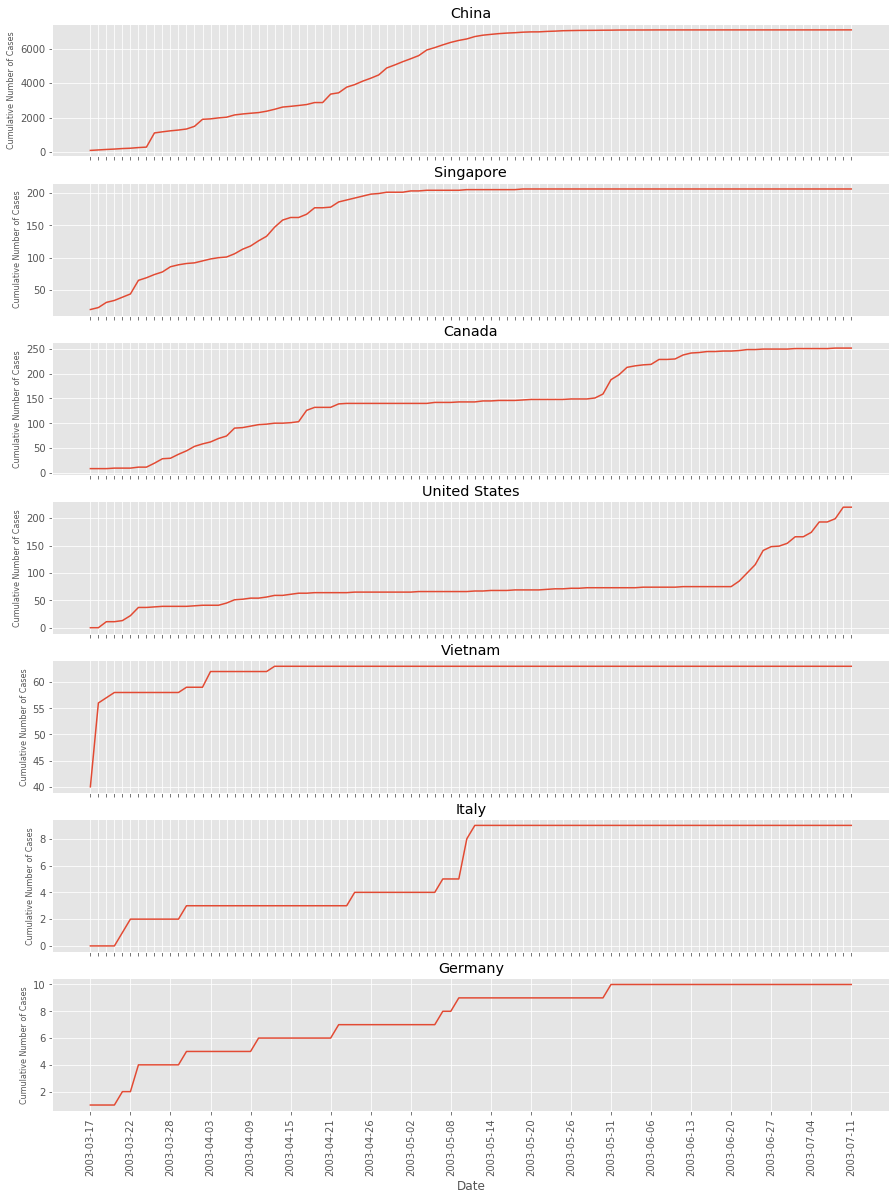

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 20)

countries = ["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]

fig, axs = plt.subplots(7, 1)
for i in range(7):
    axs[i].plot(pd.DataFrame(dfC[countries[i]]))
    axs[i].set_title(countries[i])
    
for ax in axs.flat:
    ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
    ax.set_ylabel('Cumulative Number of Cases', fontsize=8)
       
for ax in axs.flat:
    ax.label_outer()
    
loc = plticker.MultipleLocator(base=5.0)
ax.xaxis.set_major_locator(loc)

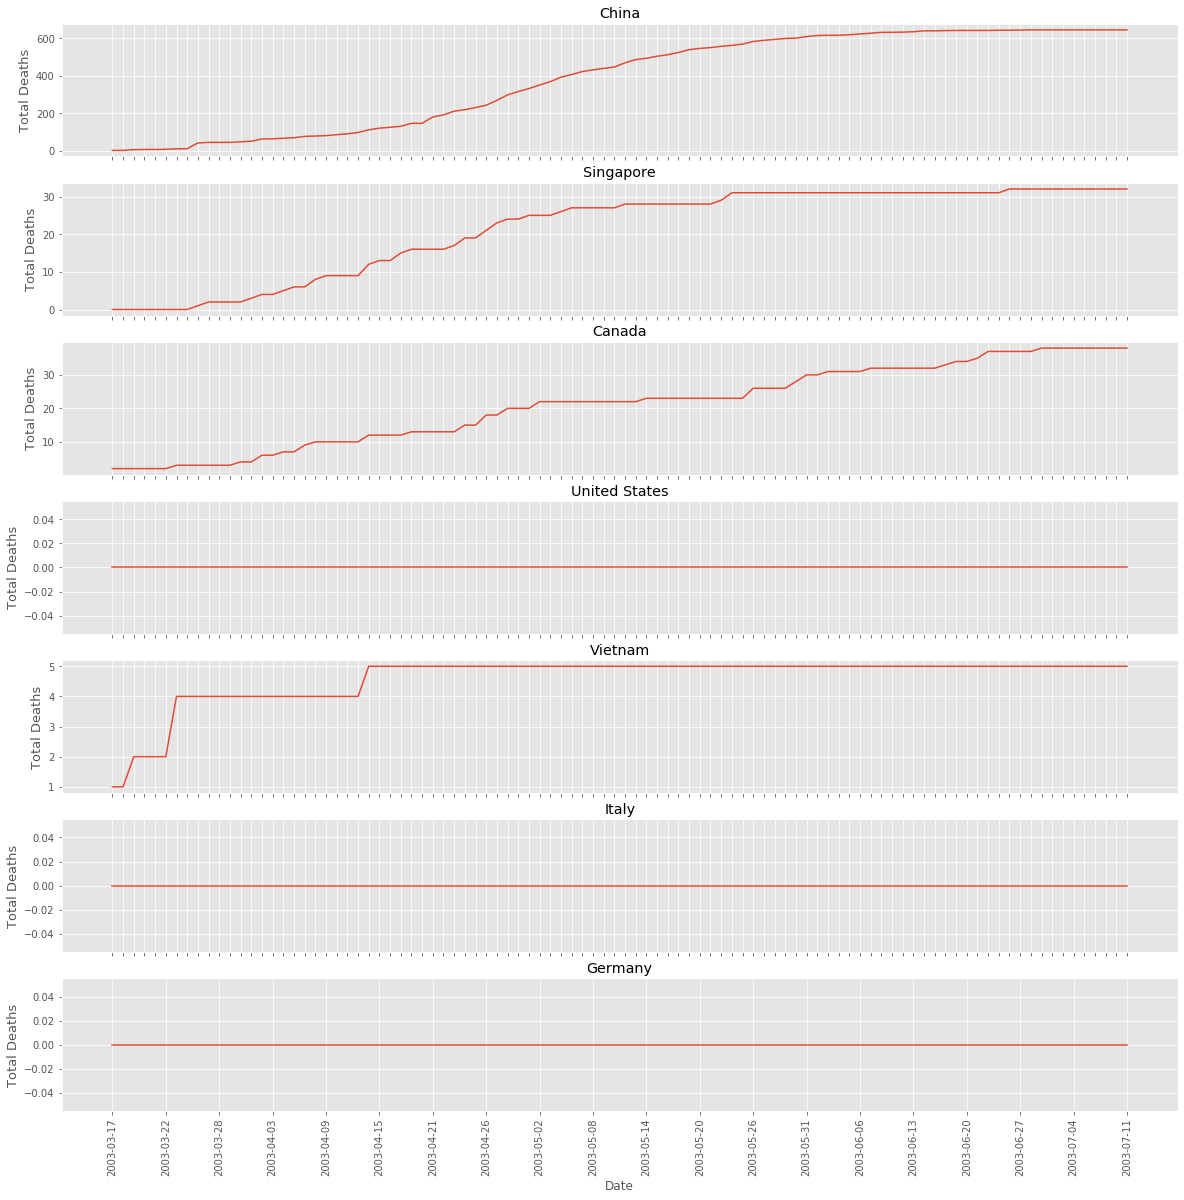

In [30]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 20)

countries = ["China", "Singapore", "Canada", "United States", "Vietnam", "Italy", "Germany"]

fig, axs = plt.subplots(7, 1)
for i in range(7):
    axs[i].plot(pd.DataFrame(dfD[countries[i]]))
    axs[i].set_title(countries[i])
    
for ax in axs.flat:
    ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
    ax.set_ylabel('Total Deaths', fontsize=13)
       
for ax in axs.flat:
    ax.label_outer()
    
loc = plticker.MultipleLocator(base=5.0)
ax.xaxis.set_major_locator(loc)

COVID-19 Data for the selected countries. This dataframe is for confirmed cases. 

In [31]:
countries = ["China", "Singapore", "Canada", "US", "Vietnam", "Italy", "Germany"]
dfCoronaC = tsCon.loc[tsCon["Country/Region"].isin(countries)]
dfCoronaC = dfCoronaC.groupby("Country/Region").sum()
dfCoronaC

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,1,1,2,2,2,4,...,943,1277,1469,2088,2790,3251,4042,4682,5576,6280
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122
Germany,0,0,0,0,0,1,4,4,4,5,...,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095
Italy,0,0,0,0,0,0,0,0,0,2,...,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689
Singapore,0,1,3,3,4,5,7,7,10,13,...,385,432,455,509,558,631,683,732,802,844
US,1,1,2,2,5,5,5,5,5,7,...,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886
Vietnam,0,2,2,2,2,2,2,2,2,2,...,91,94,113,123,134,141,153,163,174,188


In [32]:
dfFinCoronaC = pd.DataFrame(dfCoronaC["3/29/20"]).T
dfFinCoronaC

Country/Region,Canada,China,Germany,Italy,Singapore,US,Vietnam
3/29/20,6280,82122,62095,97689,844,140886,188


In [33]:
Country = ["Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"]
values = [dfFinCoronaC["Canada"].values[0], dfFinCoronaC["Germany"].values[0], 
          dfFinCoronaC["Italy"].values[0],
         dfFinCoronaC["Singapore"].values[0], dfFinCoronaC["US"].values[0], 
         dfFinCoronaC["Vietnam"].values[0], dfFinCoronaC["China"].values[0]]
Year = ["2020","2020", "2020", "2020", "2020", "2020", "2020"]
YearComp2 = pd.DataFrame({"Country": Country, "Cumulative Cases": values, "Year" :Year})
YearComp2

dfs = [YearComp, YearComp2]

yearComparison = pd.concat(dfs, ignore_index = True)
yearComparison

,Country,Cumulative Cases,Year
0,Canada,252,2003
1,Germany,10,2003
2,Italy,9,2003
3,Singapore,206,2003
4,United States,220,2003
5,Vietnam,63,2003
6,China,7084,2003
7,Canada,6280,2020
8,Germany,62095,2020
9,Italy,97689,2020


In [34]:
yearComparison.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/Comp20032020.csv")

In [35]:
dfCoronaCC = dfCoronaC.T

In [36]:
dfCoronaCC.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/CumulCases2020.csv")

In [37]:
dfFinCoronaC.to_csv("FinDayCoronaC.csv")

COVID-19 Data for the selected countries. This dataframe is for total recoveries. 

In [38]:
countries = ["China", "Singapore", "Canada", "US", "Vietnam", "Italy", "Germany"]
dfCoronaR = tsRec.loc[tsRec["Country/Region"].isin(countries)]
dfCoronaR = dfCoronaR.groupby("Country/Region").sum()
dfCoronaR

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,0,0,0,0,0,0,...,9,10,10,10,110,183,184,256,466,466
China,28,30,36,39,49,58,101,120,135,214,...,71266,71857,72362,72814,73280,73773,74181,74720,75100,75582
Germany,0,0,0,0,0,0,0,0,0,0,...,180,233,266,266,3243,3547,5673,6658,8481,9211
Italy,0,0,0,0,0,0,0,0,0,0,...,4440,6072,7024,7024,8326,9362,10361,10950,12384,13030
Singapore,0,0,0,0,0,0,0,0,0,0,...,124,140,144,144,156,160,172,183,198,212
US,0,0,0,0,0,0,0,0,0,0,...,147,176,178,178,348,361,681,869,1072,2665
Vietnam,0,0,0,0,0,0,0,0,0,0,...,16,17,17,17,17,17,20,20,21,25


In [39]:
dfFinCoronaR = pd.DataFrame(dfCoronaR["3/29/20"]).T
dfFinCoronaR

Country/Region,Canada,China,Germany,Italy,Singapore,US,Vietnam
3/29/20,466,75582,9211,13030,212,2665,25


In [40]:
dfCoronaRR = dfCoronaR.T

In [41]:
dfFinCoronaR.to_csv("FinDayCoronaR.csv")

COVID-19 Data for the selected countries. This dataframe is for total deaths. 

In [42]:
countries = ["China", "Singapore", "Canada", "US", "Vietnam", "Italy", "Germany"]
dfCoronaD = tsD.loc[tsD["Country/Region"].isin(countries)]
dfCoronaD = dfCoronaD.groupby("Country/Region").sum()
dfCoronaD

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,0,0,0,0,0,0,...,12,19,21,25,26,30,38,54,61,64
China,17,18,26,42,56,82,131,133,171,213,...,3253,3259,3274,3274,3281,3285,3291,3296,3299,3304
Germany,0,0,0,0,0,0,0,0,0,0,...,67,84,94,123,157,206,267,342,433,533
Italy,0,0,0,0,0,0,0,0,0,0,...,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,3
US,0,0,0,0,0,0,0,0,0,0,...,244,307,417,557,706,942,1209,1581,2026,2467
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dfFinCoronaD = pd.DataFrame(dfCoronaD["3/29/20"]).T
dfFinCoronaD

Country/Region,Canada,China,Germany,Italy,Singapore,US,Vietnam
3/29/20,64,3304,533,10779,3,2467,0


In [44]:
dfCoronaRR.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/RecoveredCases2020.csv")

In [45]:
dfFinCoronaD.to_csv("FinDayCoronaD.csv")

In [46]:
dfCoronaDD = dfCoronaD.T
dfCoronaDD.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/TotalDeaths2020.csv")

Time Series for COVID-19 data

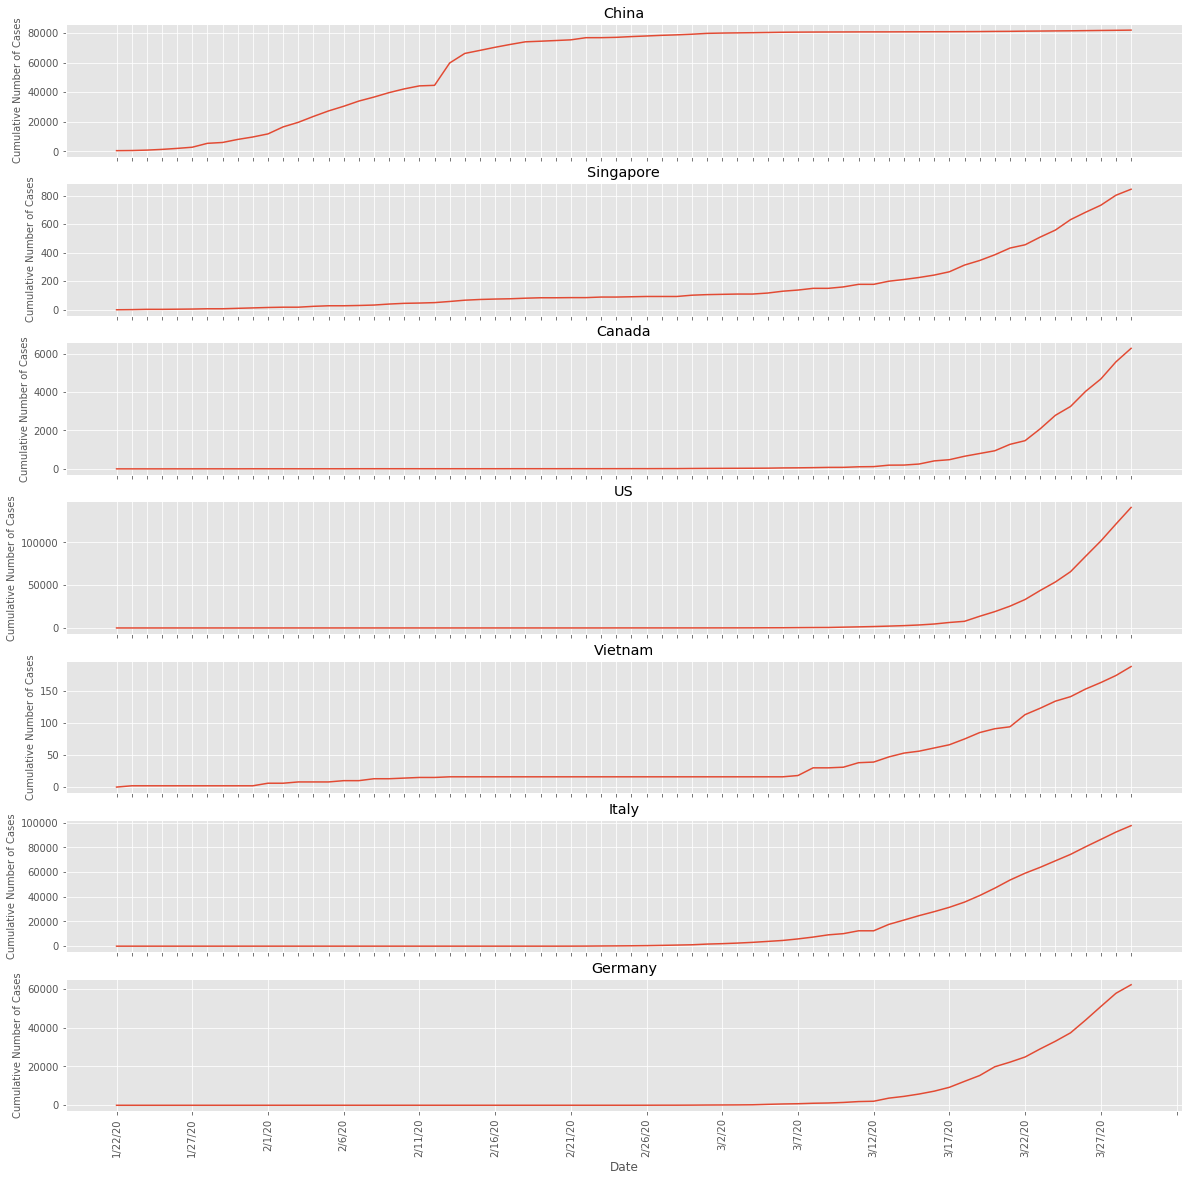

In [47]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 20)

countries = ["China", "Singapore", "Canada", "US", "Vietnam", "Italy", "Germany"]

fig, axs = plt.subplots(7, 1)
for i in range(7):
    axs[i].plot(pd.DataFrame(dfCoronaC.loc[countries[i]]))
    axs[i].set_title(countries[i])
    
for ax in axs.flat:
    ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
    ax.set_ylabel('Cumulative Number of Cases', fontsize=10)
       
for ax in axs.flat:
    ax.label_outer()
    
loc = plticker.MultipleLocator(base=5.0)
ax.xaxis.set_major_locator(loc)

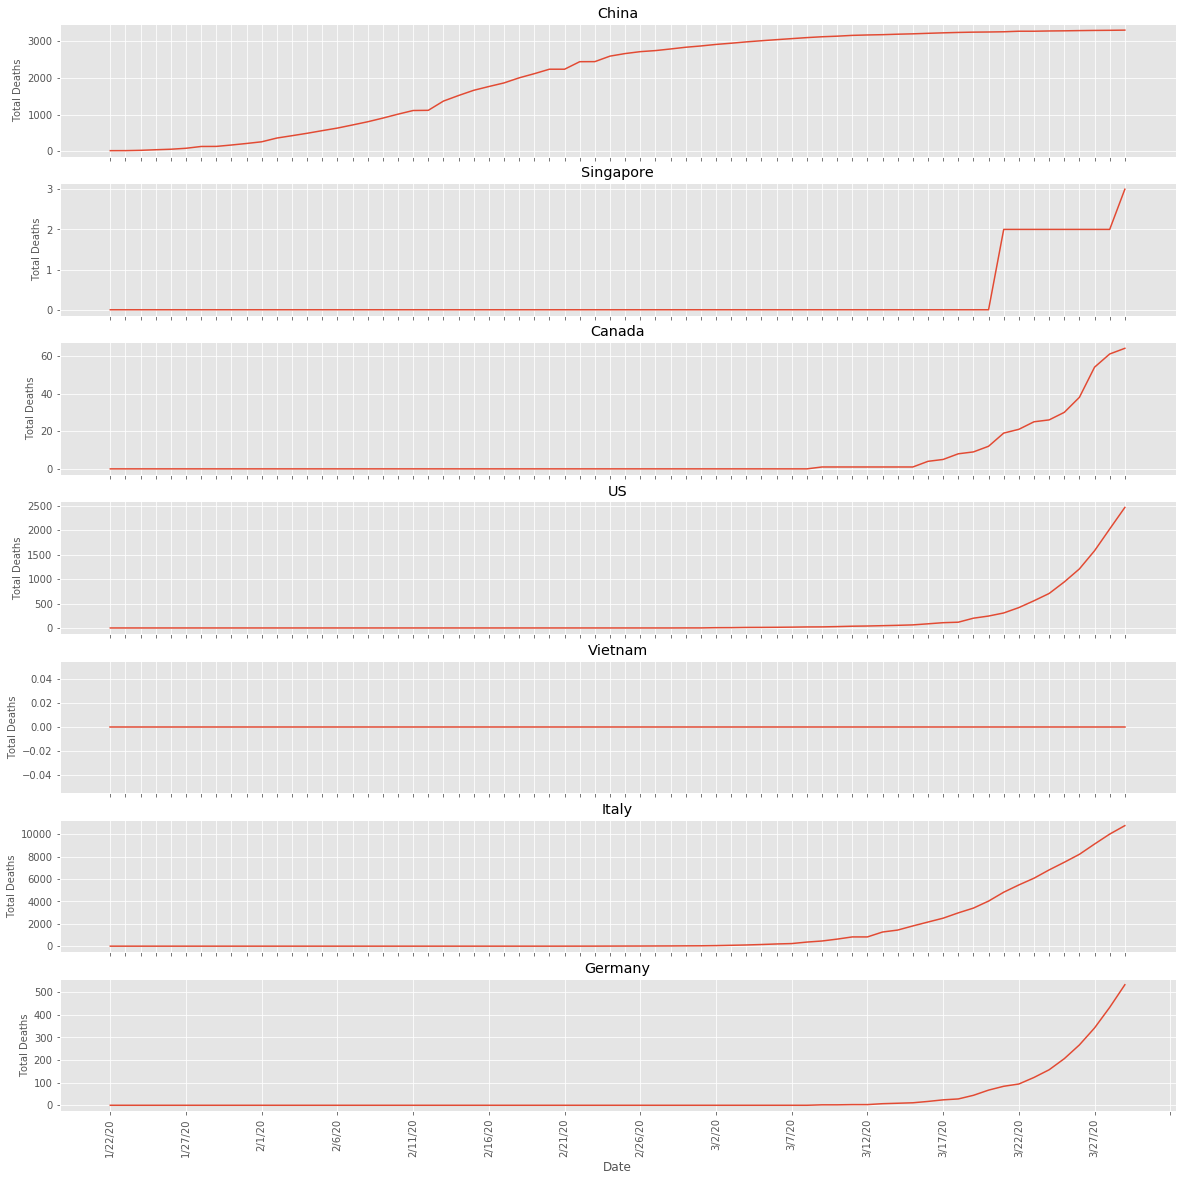

In [48]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 20)

countries = ["China", "Singapore", "Canada", "US", "Vietnam", "Italy", "Germany"]

fig, axs = plt.subplots(7, 1)
for i in range(7):
    axs[i].plot(pd.DataFrame(dfCoronaD.loc[countries[i]]))
    axs[i].set_title(countries[i])
    
for ax in axs.flat:
    ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
    ax.set_ylabel('Total Deaths', fontsize=10)
       
for ax in axs.flat:
    ax.label_outer()
    
loc = plticker.MultipleLocator(base=5.0)
ax.xaxis.set_major_locator(loc)

This code creates two dataframes. One data frame has data from the WHO report for all 28 countries in the SARS data set. The other dataframe has data from the WHO report for the 7 selected countries in the SARS data set. 

In [49]:
countries = ["China", "Singapore", "Canada", "United States of America", "Vietnam", "Italy", 
             "Germany","Finland", "United Kingdom", "Spain", "Mongolia", "Thailand",
             "France", "India", "Romania", "South Africa", "Colombia", "Brazil",
             "Malaysia", "Kuwait",  "Philippines", "Sweden", "Republic of Korea", 
             "Indonesia", "Switzerland", "Russian Federation", "Republic of Ireland", "New Zealand"]
wreport["Member State"] = wreport["Member State"].replace("Viet Nam", "Vietnam")
wreport["Member State"] = wreport["Member State"].replace("Ireland", "Republic of Ireland")

countries2 = ["China", "Singapore", "Canada", "United States of America", "Vietnam", "Italy", 
             "Germany"]
wreport["Member State"] = wreport["Member State"].replace("Viet Nam", "Vietnam")

wreport28 = wreport[wreport["Member State"].isin(countries)]
wreport28

wreport7 = wreport[wreport["Member State"].isin(countries2)]
wreport28

,Member State,Total population (2002),Annual Growth Rate (%) 1992-2002,Dependency ratio 1992,Dependency ratio 2002,Percentage of population aged 60+ (1992),Percentage of population aged 60+ (2002),Total Fertility Rate 1992,Total Fertility Rate 2002,LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002 (YEARS),...,PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 (per 1000),PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 MALES 2002 (per 1000),PROBABILITY OF DYING AGE 15-59 MALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 MALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 FEMALES 2002 (per 1000),PROBABILITY OF DYING AGE 15-59 FEMALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 FEMALES 2002 Lower Bound Uncertainty Interval (per 1000)
23,Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,...,49,34,29,40,246,235,257,136,128,145
30,Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,...,6,5,5,5,95,93,97,58,57,60
35,China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,...,33,41,38,44,165,154,175,104,93,112
36,Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,...,29,19,17,21,236,220,251,99,87,113
60,Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,...,5,3,3,3,135,131,140,60,56,64
61,France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,...,6,4,4,5,133,128,138,60,58,62
65,Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,...,6,4,4,4,118,114,123,60,59,62
77,India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,...,92,95,86,106,291,268,314,220,197,243
78,Indonesia,217131.218,1.4,64,54,6.4,7.9,3.1,2.4,66.4,...,50,36,33,40,244,226,261,208,194,224
81,Republic of Ireland,3910.840,1.0,60,47,15.3,15.3,2.0,1.9,77.1,...,9,6,5,7,113,105,121,66,62,71


In [50]:
wreport28 = wreport28.set_index('Member State')
wreport7 = wreport7.set_index('Member State')

In [51]:
wreport28 = wreport28.rename(columns = {"Total population (2002)": "Total population", 
                           "Percentage of population aged 60+ (2002)": "Percentage of population aged 60+",
                           "LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002 (YEARS)": "LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002",
                           "PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 (per 1000) ":"PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002",
                           "PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002 (per 1000) ": "PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002",
                           "PROBABILITY OF DYING AGE 15-59 MALES 2002 (per 1000) ": "PROBABILITY OF DYING AGE 15-59 MALES 2002",
                           "PROBABILITY OF DYING AGE 15-59 FEMALES 2002 (per 1000) ": "PROBABILITY OF DYING AGE 15-59 FEMALES 2002"})

In [52]:
wreport7 = wreport7.rename(columns = {"Total population (2002)": "Total population", 
                           "Percentage of population aged 60+ (2002)": "Percentage of population aged 60+",
                           "LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002 (YEARS)": "LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002",
                           "PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 (per 1000) ":"PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002",
                           "PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002 (per 1000) ": "PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002",
                           "PROBABILITY OF DYING AGE 15-59 MALES 2002 (per 1000) ": "PROBABILITY OF DYING AGE 15-59 MALES 2002",
                           "PROBABILITY OF DYING AGE 15-59 FEMALES 2002 (per 1000) ": "PROBABILITY OF DYING AGE 15-59 FEMALES 2002"})

In [53]:
wreport28

,Total population,Annual Growth Rate (%) 1992-2002,Dependency ratio 1992,Dependency ratio 2002,Percentage of population aged 60+ (1992),Percentage of population aged 60+,Total Fertility Rate 1992,Total Fertility Rate 2002,LIFE EXPECTANCY AT BIRTH BOTH SEXES 2002,LIFE EXPECTANCY AT BIRTH MALES 2002 (years),...,PROBABILITY OF DYING UNDER AGE OF 5 MALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002,PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING UNDER AGE OF 5 FEMALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 MALES 2002,PROBABILITY OF DYING AGE 15-59 MALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 MALES 2002 Lower Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 FEMALES 2002,PROBABILITY OF DYING AGE 15-59 FEMALES 2002 Upper Bound Uncertainty Interval (per 1000),PROBABILITY OF DYING AGE 15-59 FEMALES 2002 Lower Bound Uncertainty Interval (per 1000)
Member State,,,,,,,,,,,,,,,,,,,,,
Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,65.7,...,49,34,29,40,246,235,257,136,128,145
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,77.2,...,6,5,5,5,95,93,97,58,57,60
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,69.6,...,33,41,38,44,165,154,175,104,93,112
Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,67.5,...,29,19,17,21,236,220,251,99,87,113
Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,74.8,...,5,3,3,3,135,131,140,60,56,64
France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,75.9,...,6,4,4,5,133,128,138,60,58,62
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,75.6,...,6,4,4,4,118,114,123,60,59,62
India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,60.1,...,92,95,86,106,291,268,314,220,197,243
Indonesia,217131.218,1.4,64,54,6.4,7.9,3.1,2.4,66.4,64.9,...,50,36,33,40,244,226,261,208,194,224


In [54]:
wreport28.to_csv("WHOselect28.csv")
wreport7.to_csv("WHOselect7.csv")

Creates a dataframe with the final death totals on the final day of the SARS virus and the COVID-19 virus data set for the selected countries. 

In [55]:
dfD = dfD.rename(columns = {"United States": "US"})
dfC = dfC.rename(columns = {"United States": "US"})
dfR = dfR.rename(columns = {"United States": "US"})

In [56]:
d = dfD.loc["2003-07-11"]
dc = dfCoronaD["3/29/20"]
d = d.rename(index = {"Canada" : "Canada 2003", "China": "China 2003", "Germany": "Germany 2003",
                       "Italy": "Italy 2003", "Singapore": "Singapore 2003", "US": "US 2003", 
                       "Vietnam": "Vietnam 2003"})
dc = dc.rename(index = {"Canada" : "Canada 2020", "China": "China 2020", "Germany": "Germany 2020",
                       "Italy": "Italy 2020", "Singapore": "Singapore 2020", "US": "US 2020", 
                       "Vietnam": "Vietnam 2020"})

dfSCD = pd.DataFrame(pd.concat([d, dc], axis = 0)).T
dfSCD = dfSCD.rename(index = {0: "Total Deaths"})
dfSCD

,Canada 2003,Germany 2003,Italy 2003,Singapore 2003,US 2003,Vietnam 2003,China 2003,Canada 2020,China 2020,Germany 2020,Italy 2020,Singapore 2020,US 2020,Vietnam 2020
Total Deaths,38,0,0,32,0,5,646,64,3304,533,10779,3,2467,0


In [57]:
dfSCD.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/TotalDeathsLD.csv")

Creates a dataframe with the final confirmed case totals on the final day of the SARS virus and the COVID-19 virus data set for the selected countries.

In [58]:
d = dfC.loc["2003-07-11"]
dc = dfCoronaC["3/29/20"]

d = d.rename(index = {"Canada" : "Canada 2003", "China": "China 2003", "Germany": "Germany 2003",
                       "Italy": "Italy 2003", "Singapore": "Singapore 2003", "US": "US 2003", 
                       "Vietnam": "Vietnam 2003"})
dc = dc.rename(index = {"Canada" : "Canada 2020", "China": "China 2020", "Germany": "Germany 2020",
                       "Italy": "Italy 2020", "Singapore": "Singapore 2020", "US": "US 2020", 
                       "Vietnam": "Vietnam 2020"})

dfSCC = pd.DataFrame(pd.concat([d,dc], axis = 0)).T
dfSCC = dfSCC.rename(index = {0: "Cumulative Cases"})
dfSCC

,Brazil,Canada 2003,Colombia,Finland,France,Germany 2003,India,Indonesia,Italy 2003,Kuwait,...,US 2003,Vietnam 2003,China 2003,Canada 2020,China 2020,Germany 2020,Italy 2020,Singapore 2020,US 2020,Vietnam 2020
Cumulative Cases,3,252,1,1,7,10,3,2,9,1,...,220,63,7084,6280,82122,62095,97689,844,140886,188


In [59]:
dfSCC.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/Cumulative.csv")

Creates a dataframe with the recovered totals on the final day of the SARS virus and the COVID-19 virus data set for the selected countries.

In [60]:
d = dfR.loc["2003-07-11"]
dc = dfCoronaR["3/29/20"]

d = d.rename(index = {"Canada" : "Canada 2003", "China": "China 2003", "Germany": "Germany 2003",
                       "Italy": "Italy 2003", "Singapore": "Singapore 2003", "US": "US 2003", 
                       "Vietnam": "Vietnam 2003"})
dc = dc.rename(index = {"Canada" : "Canada 2020", "China": "China 2020", "Germany": "Germany 2020",
                       "Italy": "Italy 2020", "Singapore": "Singapore 2020", "US": "US 2020", 
                       "Vietnam": "Vietnam 2020"})

dfSCR = pd.DataFrame(pd.concat([d,dc], axis = 0)).T
dfSCR = dfSCR.rename(index = {0: "Number of Recovered"})
dfSCR

,Canada 2003,Germany 2003,Italy 2003,Singapore 2003,US 2003,Vietnam 2003,China 2003,Canada 2020,China 2020,Germany 2020,Italy 2020,Singapore 2020,US 2020,Vietnam 2020
Number of Recovered,194,9,9,172,67,58,6375,466,75582,9211,13030,212,2665,25


In [61]:
dfSCR.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/Recovered.csv")

Creates a dataframe that shows the cumulative number of cases on the final day of the SARS outbreak dataset for all 28 countries. 

In [62]:
d = dfC.loc["2003-07-11"]
d

Brazil                    3
Canada                  252
Colombia                  1
Finland                   1
France                    7
Germany                  10
India                     3
Indonesia                 2
Italy                     9
Kuwait                    1
Malaysia                  8
Mongolia                  9
New Zealand               1
Philippines              14
Republic of Ireland       2
Republic of Korea         3
Romania                   3
Russian Federation        1
Singapore               206
South Africa              1
Spain                     1
Sweden                    3
Switzerland               7
Thailand                  9
United Kingdom            6
US                      220
Vietnam                  63
China                  7084
Name: 2003-07-11, dtype: int64

In [63]:
dfSCC28 = pd.DataFrame(d).T
dfSCC28 = dfSCC28.rename(index = {0: "Cumulative Cases"})
dfSCC28

,Brazil,Canada,Colombia,Finland,France,Germany,India,Indonesia,Italy,Kuwait,...,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,US,Vietnam,China
2003-07-11,3,252,1,1,7,10,3,2,9,1,...,206,1,1,3,7,9,6,220,63,7084


In [64]:
dfSCC28.to_csv("/Users/markomiholjcic/Documents/GitHub/BMI6106/Project copy/Cumulative28.csv")